In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def generate_x(omega, t, x0=0):
    xleft = x0/np.pi
    omega = int(omega/np.pi)
    x = ((xleft+omega*t)%2)
    x = x*np.pi
    return x

In [3]:
def sample_x(R,Fs,tfinal):
    omega = 2*np.pi*(R+2)
    samples = tfinal*Fs
    gap = 1.0/Fs
    xs = []
    ts = []
    ts1 = []
    i = 0
    t = 0
    while(i<samples):
        ts.append(t)
        t+=gap
        ts1.append(i+1)
        i+=1
    ts = np.around(ts,decimals=6)
    i=0
    while(i<samples):
        xs.append(generate_x(omega,ts[i]))
        i+=1
    return xs

In [4]:
def split_train_and_test(R,xs):
    X = np.zeros((len(xs),2))
    for i in range(len(xs)):
        X[i][0] = xs[i]
        X[i][1] = i+1
    np.random.seed(R+2)
    np.random.shuffle(X)
    train = X[:10,:]
    test = X[10:,:]
    return train,test

In [5]:
def plot_graphs(n,theta_n,theta_y,m,ex):
    plt.title("D = "+str(m)+", N = "+str(len(theta_n))+" "+ex)
    plt.plot(n,theta_n,'o')
    plt.plot(n,theta_y,'ro')

def decay_lrate(initial_lrate, decay, iteration):
    return initial_lrate * (1.0 / (1.0 + decay * iteration))    
    
def gradient_descent(train,test,Fs,M):
    least = np.Infinity
    optimum_m=0
    n,theta_n,n1,theta_n1 = [],[],[],[]
    for i in range(len(train)):
        n.append(train[i][1])
        theta_n.append(train[i][0])
        
    for i in range(len(test)):
        n1.append(test[i][1])
        theta_n1.append(test[i][0])
    
    for i in range(len(M)):
        m = M[i][0]
        phi = np.zeros((len(train),m+1))
        phi_test = np.zeros((len(test),m+1))
        
        for i in range(len(test)):
            for j in range(m+1):
                phi_test[i][j] = pow(test[i][1]/Fs,j)
                
                
        for i in range(len(train)):
            for j in range(m+1):
                phi[i][j] = pow(train[i][1]/Fs,j)
                     
        t = np.zeros((len(train),1))
        for i in range(len(train)):
            t[i][0] = train[i][0]
        
        
        weights = np.random.randn(m+1,1)*(np.sqrt(2))
        alpha = 0.06
        epochs = 10000
        for i in range(epochs):
            E = np.dot((t-np.dot(phi,weights)).T,t-np.dot(phi,weights))
            loss = np.sum(E)*(1/len(train))
            dE = (np.dot(phi.T,t-np.dot(phi,weights)))*(-2.0)*(1.0/len(train))
            weights  = weights - alpha*dE
        
        pred = np.dot(phi,weights)
        pred1 = np.dot(phi_test,weights)
        
        if(loss<least):
            least=loss
            optimum_m = m
        
        theta_y,theta_y1 = [],[]
        for i in range(len(train)):
            theta_y.append(pred[i])
        for i in range(len(test)):
            theta_y1.append(pred1[i])
            
        print("original train data")
        plot_graphs(n,theta_n,theta_y,m,"train")
        plt.show()
        print("original test data")
        plot_graphs(n1,theta_n1,theta_y1,m,"test")
        plt.show()
    return optimum_m

original train data


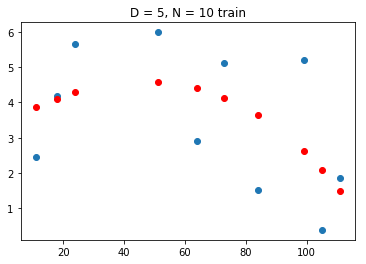

original test data


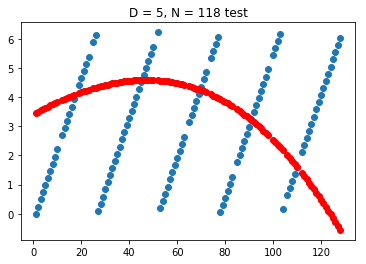

original train data


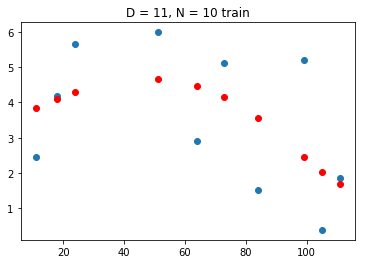

original test data


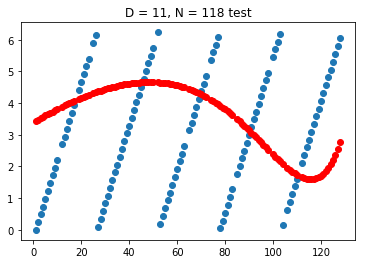

original train data


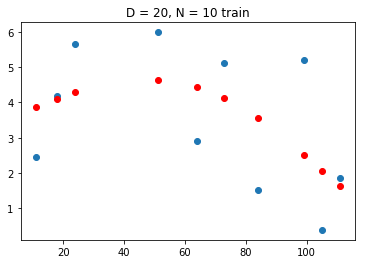

original test data


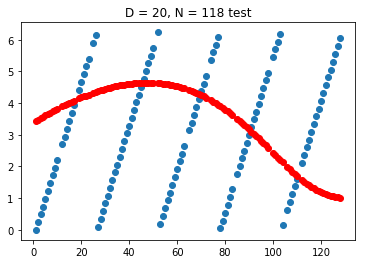

In [6]:
M = np.array([[5],[11],[20]])
Fs = 128
tfinal = 1
R = 3
xs = sample_x(R,Fs,tfinal)
train,test = split_train_and_test(3,xs)
optimum_m = gradient_descent(train,test,Fs,M)